In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [4]:
population_model = "PBH-bpower-2nd"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_4/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [5]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

# prior_dict['ms'] = Uniform(5.0, 15.0, name='$m_*$')
# prior_dict['α1'] = Uniform(0.0, 80.0, name='$\\alpha_1$')
# prior_dict['α2'] = Uniform(1.0, 3.0, name='$\\alpha_2$')
# prior_dict['log_fpbh'] = Uniform(-3.0, 0.0, name='$\\log_{10}fpbh$')

prior_dict

{'ms': Uniform(minimum=3.0, maximum=15.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None),
 'α1': Uniform(minimum=0.0, maximum=100.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None),
 'α2': Uniform(minimum=1.0, maximum=3.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

21:54 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4/'
21:54 bilby INFO    : Search parameters:
21:54 bilby INFO    :   ms = Uniform(minimum=3.0, maximum=15.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None)
21:54 bilby INFO    :   α1 = Uniform(minimum=0.0, maximum=100.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None)
21:54 bilby INFO    :   α2 = Uniform(minimum=1.0, maximum=3.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None)
21:54 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
21:54 bilby INFO    :   H0 = 67.4
21:54 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


21:56 bilby INFO    : Single likelihood evaluation took 1.083e+00 s


0it [00:00, ?it/s]

21:56 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f103d9f22e0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
21:56 bilby INFO    : Checkpoint every check_point_delta_t = 60s
21:56 bilby INFO    : Using dynesty version 1.0.1
21:56 bilby INFO    : Using the bilby-implemented rwalk sampl

4030it [01:05, 61.41it/s, bound:226 nc: 31 ncall:9.1e+04 eff:4.4% logz=-1777.52+/-0.16 dlogz:3.544>0.1]

21:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4061it [02:13, 20.15it/s, bound:229 nc: 34 ncall:9.2e+04 eff:4.4% logz=-1777.46+/-0.17 dlogz:3.422>0.1]

21:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4091it [03:20,  8.67it/s, bound:233 nc: 35 ncall:9.3e+04 eff:4.4% logz=-1777.40+/-0.17 dlogz:3.307>0.1]

21:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
21:59 bilby INFO    : Writing 101 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4122it [04:24,  4.30it/s, bound:236 nc: 36 ncall:9.4e+04 eff:4.4% logz=-1777.34+/-0.17 dlogz:3.190>0.1]

22:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:00 bilby INFO    : Writing 107 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4150it [05:30,  2.22it/s, bound:240 nc: 47 ncall:9.5e+04 eff:4.3% logz=-1777.29+/-0.17 dlogz:3.085>0.1]

22:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:01 bilby INFO    : Writing 125 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4179it [06:38,  1.25it/s, bound:243 nc: 37 ncall:9.7e+04 eff:4.3% logz=-1777.23+/-0.17 dlogz:2.980>0.1]

22:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:03 bilby INFO    : Writing 127 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4207it [07:44,  1.26s/it, bound:247 nc: 39 ncall:9.8e+04 eff:4.3% logz=-1777.18+/-0.17 dlogz:2.879>0.1]

22:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:04 bilby INFO    : Writing 110 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4237it [08:49,  1.67s/it, bound:250 nc: 35 ncall:9.9e+04 eff:4.3% logz=-1777.13+/-0.17 dlogz:2.773>0.1]

22:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:05 bilby INFO    : Writing 125 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4269it [09:56,  1.96s/it, bound:253 nc: 40 ncall:1.0e+05 eff:4.3% logz=-1777.08+/-0.17 dlogz:2.662>0.1]

22:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:06 bilby INFO    : Writing 136 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4298it [11:03,  2.19s/it, bound:257 nc: 38 ncall:1.0e+05 eff:4.3% logz=-1777.03+/-0.17 dlogz:2.564>0.1]

22:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:07 bilby INFO    : Writing 147 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4328it [12:08,  2.23s/it, bound:260 nc:112 ncall:1.0e+05 eff:4.2% logz=-1776.98+/-0.17 dlogz:2.465>0.1]

22:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:08 bilby INFO    : Writing 161 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4358it [13:14,  2.21s/it, bound:264 nc: 34 ncall:1.0e+05 eff:4.2% logz=-1776.94+/-0.17 dlogz:2.369>0.1]

22:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:09 bilby INFO    : Writing 163 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4388it [14:18,  2.52s/it, bound:267 nc: 21 ncall:1.0e+05 eff:4.2% logz=-1776.89+/-0.17 dlogz:2.275>0.1]

22:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:10 bilby INFO    : Writing 165 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4413it [15:24,  2.57s/it, bound:270 nc: 77 ncall:1.1e+05 eff:4.2% logz=-1776.86+/-0.17 dlogz:2.198>0.1]

22:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:11 bilby INFO    : Writing 193 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4435it [16:30,  3.14s/it, bound:274 nc: 25 ncall:1.1e+05 eff:4.2% logz=-1776.82+/-0.17 dlogz:2.132>0.1]

22:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:12 bilby INFO    : Writing 199 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4465it [17:40,  3.15s/it, bound:277 nc: 40 ncall:1.1e+05 eff:4.2% logz=-1776.78+/-0.17 dlogz:2.043>0.1]

22:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:14 bilby INFO    : Writing 242 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4494it [18:50,  3.10s/it, bound:281 nc: 39 ncall:1.1e+05 eff:4.1% logz=-1776.74+/-0.17 dlogz:2.025>0.1]

22:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:15 bilby INFO    : Writing 176 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4523it [19:58,  2.94s/it, bound:285 nc: 37 ncall:1.1e+05 eff:4.1% logz=-1776.71+/-0.17 dlogz:2.102>0.1]

22:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:16 bilby INFO    : Writing 185 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4552it [21:06,  2.81s/it, bound:289 nc: 33 ncall:1.1e+05 eff:4.1% logz=-1776.67+/-0.17 dlogz:2.020>0.1]

22:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:17 bilby INFO    : Writing 187 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4583it [22:15,  2.62s/it, bound:292 nc: 36 ncall:1.1e+05 eff:4.1% logz=-1776.63+/-0.17 dlogz:1.935>0.1]

22:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:18 bilby INFO    : Writing 196 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4614it [23:25,  2.48s/it, bound:296 nc: 37 ncall:1.1e+05 eff:4.1% logz=-1776.60+/-0.17 dlogz:1.852>0.1]

22:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:19 bilby INFO    : Writing 236 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4645it [24:34,  2.35s/it, bound:300 nc: 36 ncall:1.1e+05 eff:4.0% logz=-1776.57+/-0.17 dlogz:1.772>0.1]

22:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:21 bilby INFO    : Writing 255 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4674it [25:43,  2.64s/it, bound:304 nc: 38 ncall:1.2e+05 eff:4.0% logz=-1776.54+/-0.17 dlogz:1.700>0.1]

22:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:22 bilby INFO    : Writing 270 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4702it [26:49,  2.71s/it, bound:307 nc: 31 ncall:1.2e+05 eff:4.0% logz=-1776.51+/-0.17 dlogz:1.631>0.1]

22:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:23 bilby INFO    : Writing 271 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4726it [27:56,  3.03s/it, bound:311 nc: 38 ncall:1.2e+05 eff:4.0% logz=-1776.48+/-0.17 dlogz:1.573>0.1]

22:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:24 bilby INFO    : Writing 279 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4752it [29:05,  3.02s/it, bound:314 nc: 36 ncall:1.2e+05 eff:4.0% logz=-1776.46+/-0.17 dlogz:1.512>0.1]

22:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:25 bilby INFO    : Writing 304 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4780it [30:10,  2.76s/it, bound:318 nc: 69 ncall:1.2e+05 eff:4.0% logz=-1776.43+/-0.17 dlogz:1.448>0.1]

22:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:26 bilby INFO    : Writing 305 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4802it [31:16,  2.96s/it, bound:321 nc: 47 ncall:1.2e+05 eff:4.0% logz=-1776.41+/-0.17 dlogz:1.399>0.1]

22:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:27 bilby INFO    : Writing 340 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4824it [32:25,  3.13s/it, bound:324 nc: 40 ncall:1.2e+05 eff:3.9% logz=-1776.39+/-0.17 dlogz:1.351>0.1]

22:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:28 bilby INFO    : Writing 345 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4855it [33:35,  2.67s/it, bound:328 nc: 39 ncall:1.2e+05 eff:3.9% logz=-1776.36+/-0.17 dlogz:1.286>0.1]

22:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:30 bilby INFO    : Writing 374 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4887it [34:44,  2.76s/it, bound:332 nc: 36 ncall:1.2e+05 eff:3.9% logz=-1776.34+/-0.17 dlogz:1.222>0.1]

22:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:31 bilby INFO    : Writing 386 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4919it [35:53,  2.74s/it, bound:335 nc: 37 ncall:1.3e+05 eff:3.9% logz=-1776.31+/-0.17 dlogz:1.160>0.1]

22:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:32 bilby INFO    : Writing 456 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4948it [37:02,  2.80s/it, bound:339 nc: 39 ncall:1.3e+05 eff:3.9% logz=-1776.29+/-0.17 dlogz:1.106>0.1]

22:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:33 bilby INFO    : Writing 450 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4978it [38:07,  2.65s/it, bound:343 nc: 29 ncall:1.3e+05 eff:3.9% logz=-1776.27+/-0.17 dlogz:1.052>0.1]

22:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:34 bilby INFO    : Writing 502 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5002it [39:16,  2.91s/it, bound:346 nc: 69 ncall:1.3e+05 eff:3.9% logz=-1776.25+/-0.17 dlogz:1.010>0.1]

22:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:35 bilby INFO    : Writing 477 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5033it [40:26,  2.62s/it, bound:350 nc: 38 ncall:1.3e+05 eff:3.8% logz=-1776.23+/-0.17 dlogz:0.958>0.1]

22:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:36 bilby INFO    : Writing 508 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5064it [41:33,  2.40s/it, bound:354 nc: 40 ncall:1.3e+05 eff:3.8% logz=-1776.21+/-0.17 dlogz:0.908>0.1]

22:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:38 bilby INFO    : Writing 576 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5090it [42:36,  2.77s/it, bound:357 nc: 37 ncall:1.3e+05 eff:3.8% logz=-1776.19+/-0.17 dlogz:0.868>0.1]

22:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:39 bilby INFO    : Writing 612 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5118it [43:46,  3.06s/it, bound:360 nc: 38 ncall:1.3e+05 eff:3.8% logz=-1776.18+/-0.17 dlogz:0.826>0.1]

22:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:40 bilby INFO    : Writing 638 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5149it [44:56,  2.95s/it, bound:364 nc: 36 ncall:1.4e+05 eff:3.8% logz=-1776.16+/-0.17 dlogz:0.782>0.1]

22:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:41 bilby INFO    : Writing 651 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5179it [46:08,  2.92s/it, bound:368 nc: 40 ncall:1.4e+05 eff:3.8% logz=-1776.14+/-0.17 dlogz:0.741>0.1]

22:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:42 bilby INFO    : Writing 686 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5210it [47:18,  2.75s/it, bound:372 nc: 40 ncall:1.4e+05 eff:3.8% logz=-1776.12+/-0.17 dlogz:0.700>0.1]

22:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:43 bilby INFO    : Writing 701 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5239it [48:27,  2.66s/it, bound:376 nc: 35 ncall:1.4e+05 eff:3.8% logz=-1776.11+/-0.17 dlogz:0.664>0.1]

22:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:44 bilby INFO    : Writing 753 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5269it [49:37,  2.49s/it, bound:380 nc:116 ncall:1.4e+05 eff:3.8% logz=-1776.09+/-0.17 dlogz:0.629>0.1]

22:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:46 bilby INFO    : Writing 845 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5297it [50:41,  2.67s/it, bound:384 nc: 34 ncall:1.4e+05 eff:3.7% logz=-1776.08+/-0.17 dlogz:0.597>0.1]

22:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:47 bilby INFO    : Writing 895 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5325it [51:50,  2.86s/it, bound:387 nc: 33 ncall:1.4e+05 eff:3.7% logz=-1776.07+/-0.17 dlogz:0.566>0.1]

22:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:48 bilby INFO    : Writing 942 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5350it [52:56,  3.07s/it, bound:391 nc: 38 ncall:1.4e+05 eff:3.7% logz=-1776.06+/-0.17 dlogz:0.540>0.1]

22:49 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:49 bilby INFO    : Writing 1003 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5378it [54:07,  3.04s/it, bound:394 nc: 71 ncall:1.4e+05 eff:3.7% logz=-1776.04+/-0.17 dlogz:0.512>0.1]

22:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:50 bilby INFO    : Writing 1068 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5407it [55:17,  2.88s/it, bound:398 nc: 38 ncall:1.5e+05 eff:3.7% logz=-1776.03+/-0.17 dlogz:0.485>0.1]

22:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:51 bilby INFO    : Writing 1104 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5438it [56:27,  2.62s/it, bound:402 nc: 40 ncall:1.5e+05 eff:3.7% logz=-1776.02+/-0.17 dlogz:0.457>0.1]

22:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:52 bilby INFO    : Writing 1178 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5468it [57:36,  2.47s/it, bound:405 nc: 35 ncall:1.5e+05 eff:3.7% logz=-1776.01+/-0.17 dlogz:0.431>0.1]

22:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:54 bilby INFO    : Writing 1246 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5497it [58:45,  2.75s/it, bound:409 nc: 33 ncall:1.5e+05 eff:3.7% logz=-1776.00+/-0.17 dlogz:0.408>0.1]

22:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:55 bilby INFO    : Writing 1336 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5527it [59:56,  2.85s/it, bound:413 nc: 40 ncall:1.5e+05 eff:3.7% logz=-1775.99+/-0.17 dlogz:0.385>0.1]

22:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:56 bilby INFO    : Writing 1419 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5557it [1:01:06,  2.79s/it, bound:417 nc: 33 ncall:1.5e+05 eff:3.7% logz=-1775.98+/-0.17 dlogz:0.363>0.1]

22:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:57 bilby INFO    : Writing 1491 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5588it [1:02:14,  2.62s/it, bound:421 nc: 35 ncall:1.5e+05 eff:3.6% logz=-1775.97+/-0.17 dlogz:0.341>0.1]

22:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:58 bilby INFO    : Writing 1552 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5620it [1:03:25,  2.47s/it, bound:424 nc: 75 ncall:1.5e+05 eff:3.6% logz=-1775.95+/-0.17 dlogz:0.320>0.1]

22:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
22:59 bilby INFO    : Writing 1635 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5649it [1:04:35,  2.46s/it, bound:428 nc: 40 ncall:1.6e+05 eff:3.6% logz=-1775.95+/-0.17 dlogz:0.303>0.1]

23:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:01 bilby INFO    : Writing 1813 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5680it [1:05:45,  2.68s/it, bound:432 nc: 80 ncall:1.6e+05 eff:3.6% logz=-1775.94+/-0.17 dlogz:0.285>0.1]

23:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:02 bilby INFO    : Writing 1880 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5712it [1:06:56,  2.68s/it, bound:436 nc: 40 ncall:1.6e+05 eff:3.6% logz=-1775.93+/-0.17 dlogz:0.267>0.1]

23:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:03 bilby INFO    : Writing 1966 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5741it [1:08:07,  2.73s/it, bound:440 nc:114 ncall:1.6e+05 eff:3.6% logz=-1775.92+/-0.17 dlogz:0.252>0.1]

23:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:04 bilby INFO    : Writing 2009 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5772it [1:09:18,  2.59s/it, bound:444 nc: 40 ncall:1.6e+05 eff:3.6% logz=-1775.91+/-0.17 dlogz:0.237>0.1]

23:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:05 bilby INFO    : Writing 2030 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5803it [1:10:30,  2.45s/it, bound:448 nc: 40 ncall:1.6e+05 eff:3.6% logz=-1775.91+/-0.17 dlogz:0.223>0.1]

23:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:06 bilby INFO    : Writing 2044 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5833it [1:11:42,  2.72s/it, bound:452 nc: 40 ncall:1.6e+05 eff:3.6% logz=-1775.90+/-0.17 dlogz:0.211>0.1]

23:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:08 bilby INFO    : Writing 2012 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5863it [1:12:54,  2.75s/it, bound:456 nc: 40 ncall:1.6e+05 eff:3.6% logz=-1775.89+/-0.17 dlogz:0.199>0.1]

23:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:09 bilby INFO    : Writing 2009 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5893it [1:14:06,  2.69s/it, bound:460 nc: 40 ncall:1.7e+05 eff:3.6% logz=-1775.89+/-0.17 dlogz:0.187>0.1]

23:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:10 bilby INFO    : Writing 2025 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5925it [1:15:19,  2.49s/it, bound:464 nc: 40 ncall:1.7e+05 eff:3.5% logz=-1775.88+/-0.17 dlogz:0.175>0.1]

23:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:11 bilby INFO    : Writing 2037 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5956it [1:16:31,  2.73s/it, bound:468 nc: 79 ncall:1.7e+05 eff:3.5% logz=-1775.87+/-0.17 dlogz:0.165>0.1]

23:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:13 bilby INFO    : Writing 2004 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5985it [1:17:42,  2.86s/it, bound:472 nc: 76 ncall:1.7e+05 eff:3.5% logz=-1775.87+/-0.17 dlogz:0.156>0.1]

23:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:14 bilby INFO    : Writing 2017 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6017it [1:18:54,  2.67s/it, bound:476 nc: 40 ncall:1.7e+05 eff:3.5% logz=-1775.86+/-0.17 dlogz:0.147>0.1]

23:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:15 bilby INFO    : Writing 2038 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6048it [1:20:06,  2.52s/it, bound:480 nc: 40 ncall:1.7e+05 eff:3.5% logz=-1775.86+/-0.17 dlogz:0.138>0.1]

23:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:16 bilby INFO    : Writing 1979 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6079it [1:21:17,  2.75s/it, bound:484 nc: 40 ncall:1.7e+05 eff:3.5% logz=-1775.85+/-0.17 dlogz:0.130>0.1]

23:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:17 bilby INFO    : Writing 1984 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6110it [1:22:28,  2.77s/it, bound:488 nc: 40 ncall:1.7e+05 eff:3.5% logz=-1775.85+/-0.17 dlogz:0.122>0.1]

23:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:18 bilby INFO    : Writing 2058 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6140it [1:23:39,  2.75s/it, bound:492 nc: 80 ncall:1.8e+05 eff:3.5% logz=-1775.85+/-0.17 dlogz:0.115>0.1]

23:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:20 bilby INFO    : Writing 2024 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6171it [1:24:51,  2.60s/it, bound:496 nc: 40 ncall:1.8e+05 eff:3.5% logz=-1775.84+/-0.17 dlogz:0.108>0.1]

23:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:21 bilby INFO    : Writing 2003 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6203it [1:26:03,  2.43s/it, bound:500 nc: 40 ncall:1.8e+05 eff:3.5% logz=-1775.84+/-0.17 dlogz:0.101>0.1]

23:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:22 bilby INFO    : Writing 1995 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6209it [1:26:06,  2.17s/it, bound:501 nc:  1 ncall:1.8e+05 eff:3.5% logz=-1775.84+/-0.17 dlogz:0.100>0.1]

23:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_resume.pickle
23:22 bilby INFO    : Writing 2038 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
23:22 bilby INFO    : Starting to close worker pool.
23:22 bilby INFO    : Finished closing worker pool.


6209it [1:26:09,  1.20it/s, bound:501 nc:  1 ncall:1.8e+05 eff:3.8% logz=-1775.77+/-0.18 dlogz:0.000>0.1]

23:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


23:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:22 bilby WARNING : Multiple likelihood matches found between 

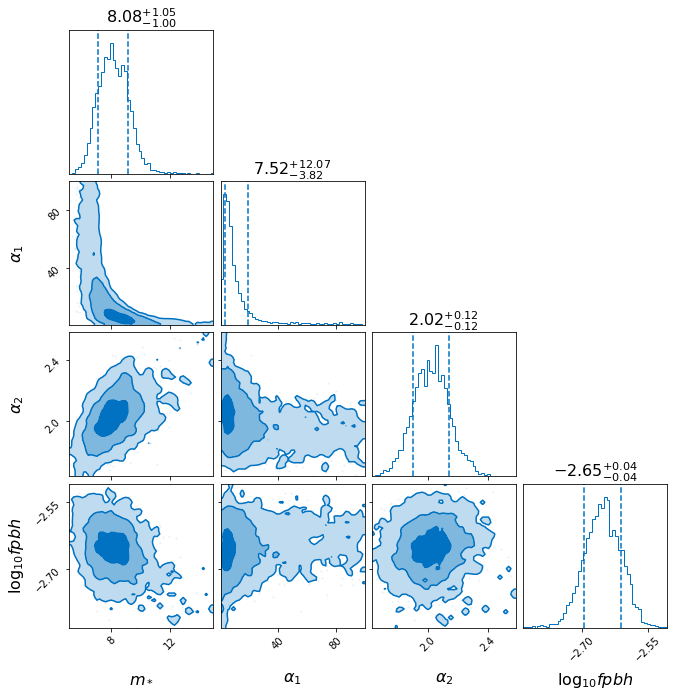

In [6]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [7]:
import numpy as np
np.exp(-1059.681-(-1059.303))

0.685230500665919

In [8]:
import numpy as np
np.exp(-1059.681-(-1060.368))

1.987743349398055